## Ridge & Lasso Regression

In [1]:
# Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing

# Aesthetics.
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic relationships between
# solar radiation and day or tempature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R-squared for the model with few features: ')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features: ')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features: ')
print(origparams)

print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

R-squared for the model with few features: 
0.4500625793011847

Parameter estimates for the model with few features: 
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897057

Parameter estimates for the model with many features: 
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]
0.44553225151184195
0.4380466345914472


The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

In [136]:
# Given lambda value.
lambdas = np.arange(1, 100, .1)
#lambdas = [0.01, 0.1, 0.5, 0.75, 1, 1.5, 2,5,10,20,50,75,100, 200, 500]
#lambdas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Empty ridge and lasso r-squared lists.
rsquared_ridge = []
rsquared_lasso = []

# Ridge regression.
for l in lambdas:
    ridgeregrBig = linear_model.Ridge(alpha=l, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    rsquared_ridge.append(ridgeregrBig.score(X_train2, Y_train))
    
# Lasso regression.
for l in lambdas:
    lassBig = linear_model.Lasso(alpha=l)
    lassBig.fit(X_train2, Y_train)
    rsquared_lasso.append(lassBig.score(X_train2, Y_train))

In [142]:
df1 = pd.DataFrame({'lambda':lambdas, 'rsquared_ridge':rsquared_ridge, 
                       'rsquared_lasso':rsquared_lasso})  

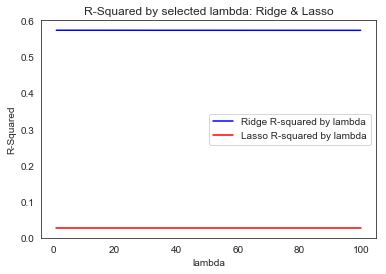

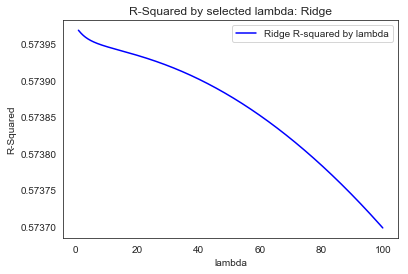

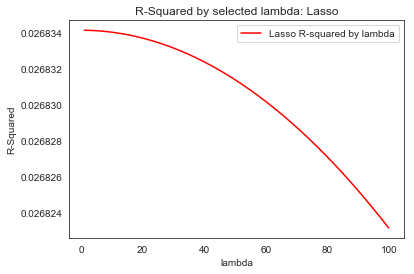

In [149]:
# Plotting results.
plt.plot(df1['lambda'], df1['rsquared_ridge'], c='b', label='Ridge R-squared by lambda')
plt.plot(df1['lambda'], df1['rsquared_lasso'], c='r', label='Lasso R-squared by lambda')
plt.title('R-Squared by selected lambda: Ridge & Lasso')
plt.xlabel('lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

# Ridge regression
plt.plot(df1['lambda'], df1['rsquared_ridge'], c='b', label='Ridge R-squared by lambda')
plt.title('R-Squared by selected lambda: Ridge')
plt.xlabel('lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

# Lasso regression
plt.plot(df1['lambda'], df1['rsquared_lasso'], c='r', label='Lasso R-squared by lambda')
plt.title('R-Squared by selected lambda: Lasso')
plt.xlabel('lambda')
plt.ylabel('R-Squared')
plt.legend()
plt.show()

Dependent on $\lambda$ value, there are few similar instances where both models have similar $R^2$. Ridge will not converge to zero $R^2$ as quickly as Lasso, which displays worse performance earlier. 

# Summary

Lasso and ridge regression are both clear improvements on OLS regression.  Ridge regression is an excellent tool to use with correlated features, while lasso is an efficient method of feature selection when dealing with an unmanageably large feature space. 